In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from sci378 import *
from pyndamics import Simulation
from pyndamics.emcee import *

Version 0.0.3
pyndamics version  0.0.10


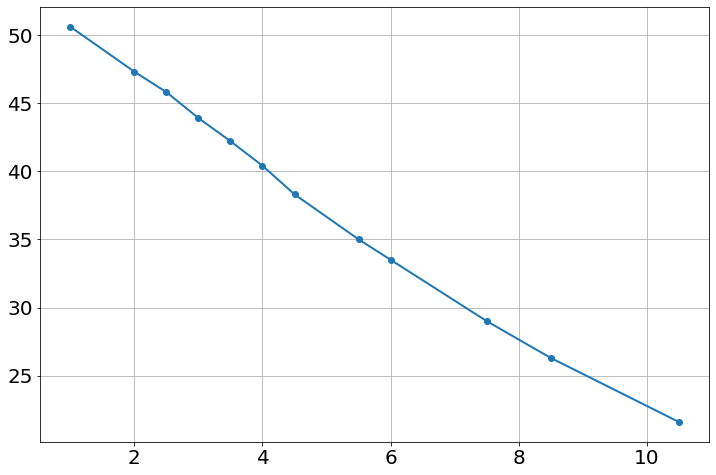

In [3]:
t=array([1,2,2.5,3,3.5,4,4.5,5.5,6,7.5,8.5,10.5])
y=array([50.6,47.3,45.8,43.9,42.2,40.4,38.3,35,33.5,29,26.3,21.6])
plot(t,y,'-o')

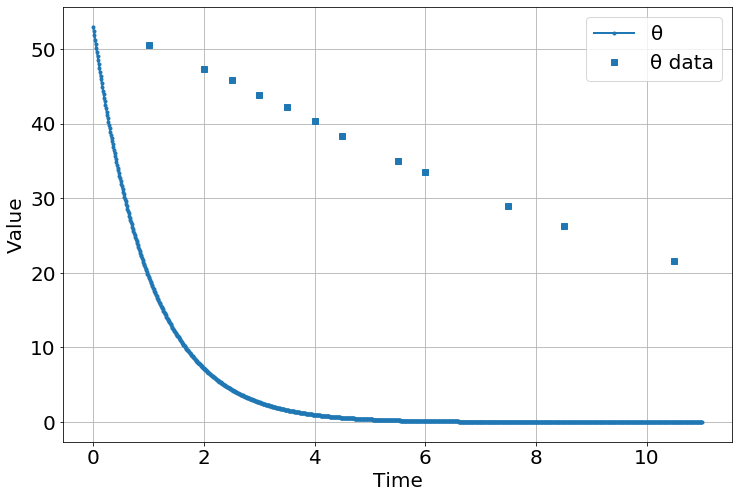

<Figure size 864x576 with 0 Axes>

In [5]:
sim=Simulation()
sim.add("θ' = -Z*θ",53,plot=True)
sim.params(Z=1)
sim.add_data(t=t,θ=y,plot=True)
sim.run(0,11)

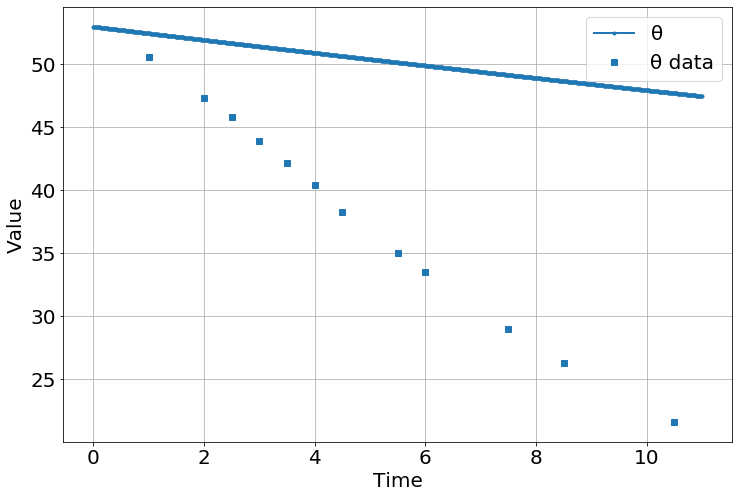

<Figure size 864x576 with 0 Axes>

In [8]:
sim=Simulation()
sim.add("θ' = -Z*θ",53,plot=True)
sim.params(Z=.01)
sim.add_data(t=t,θ=y,plot=True)
sim.run(0,11)

Sampling Prior...
Done.
0.61 s
Running MCMC 1/4...
Done.
36.13 s
Running MCMC 2/4...
Done.
31.97 s
Running MCMC 3/4...
Done.
31.38 s
Running MCMC 4/4...
Done.
31.11 s


<Figure size 864x576 with 0 Axes>

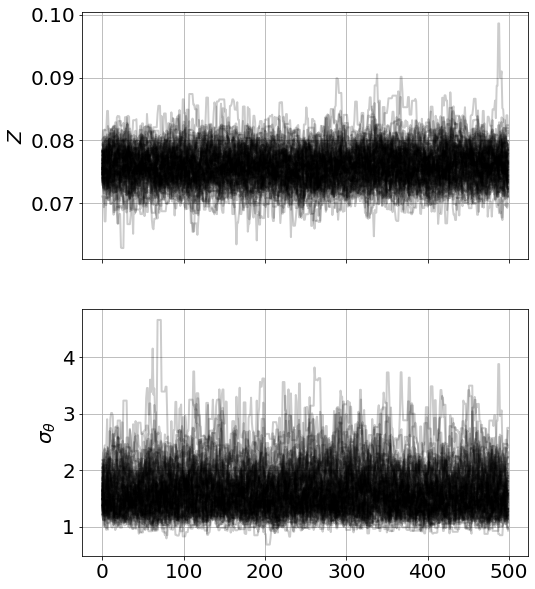

In [8]:
model=MCMCModel(sim,
               Z=Normal(5,10),
               )
model.run_mcmc(500,repeat=4)
model.plot_chains()

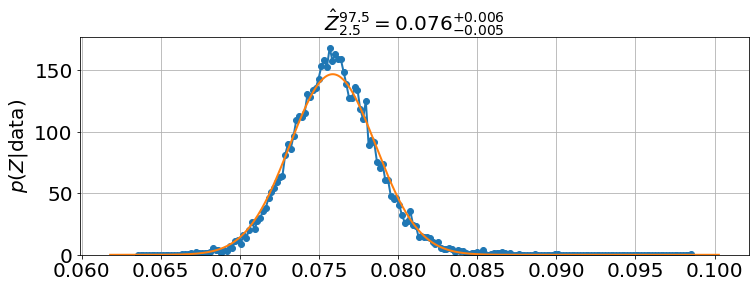

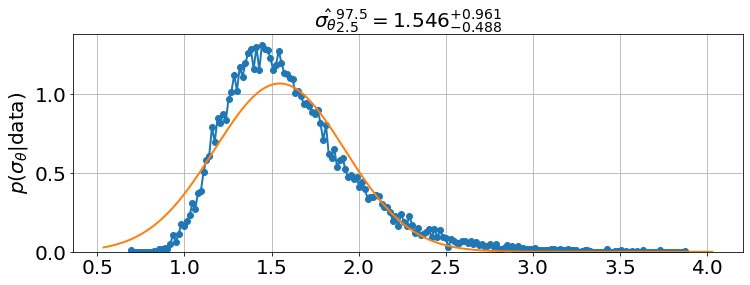

In [9]:
model.plot_distributions()

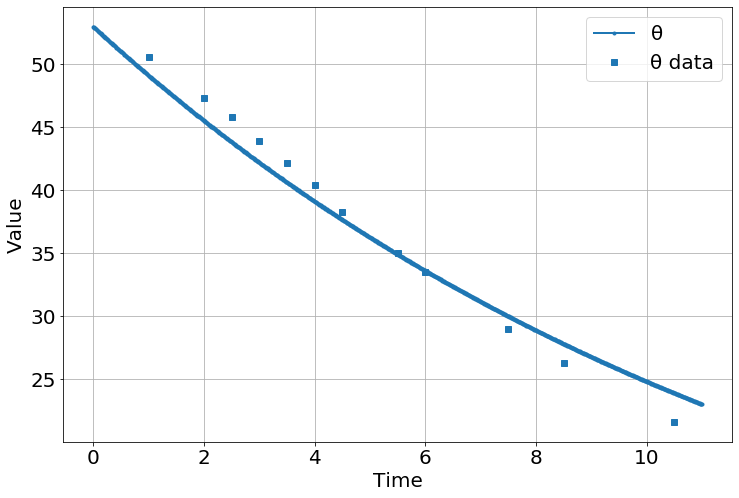

<Figure size 864x576 with 0 Axes>

In [10]:
sim.run(0,11)

## Initial value of $\theta$

Sampling Prior...
Done.
0.94 s
Running MCMC 1/4...


/Users/bblais/opt/anaconda3/lib/python3.7/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]


Done.
1 m, 17.54 s
Running MCMC 2/4...
Done.
45.69 s
Running MCMC 3/4...
Done.
47.35 s
Running MCMC 4/4...
Done.
46.54 s


<Figure size 864x576 with 0 Axes>

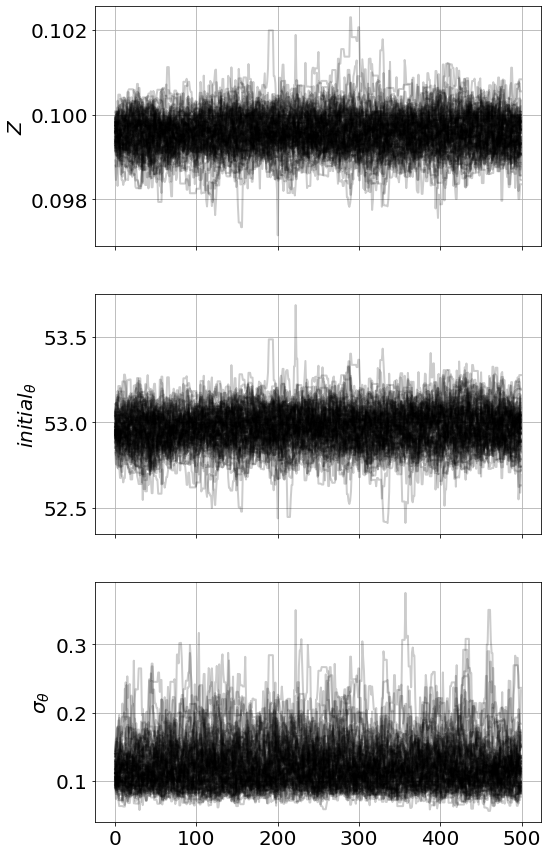

In [14]:
model=MCMCModel(sim,
               Z=Normal(5,10),
                initial_θ=Normal(53,10)
               )
model.run_mcmc(500,repeat=4)
model.plot_chains()θ

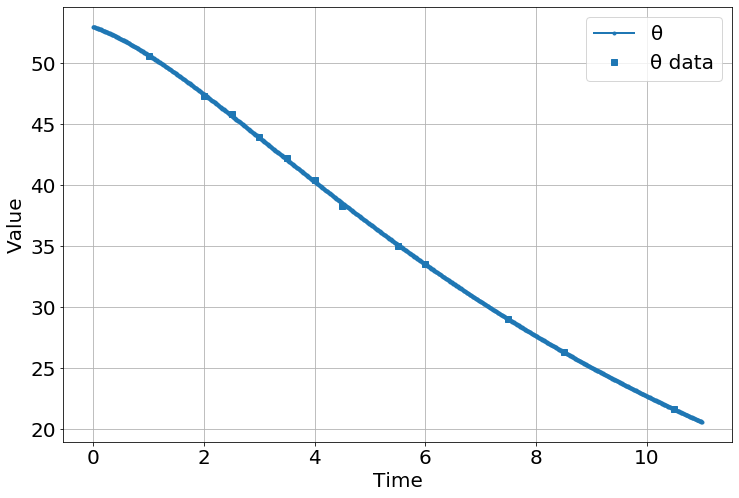

<Figure size 864x576 with 0 Axes>

In [15]:
sim.run(0,11)

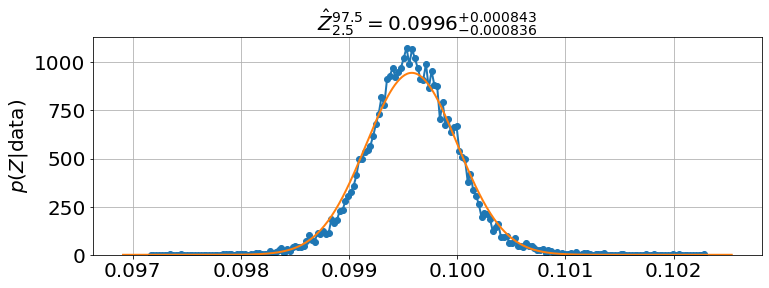

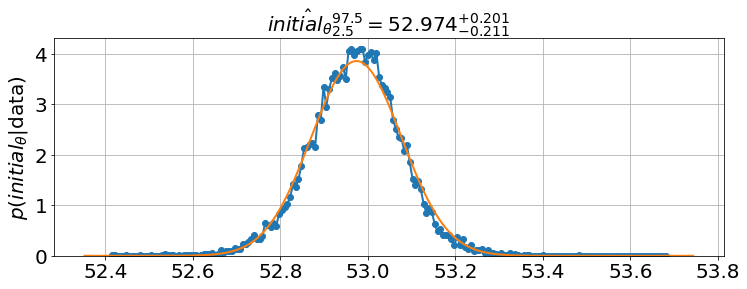

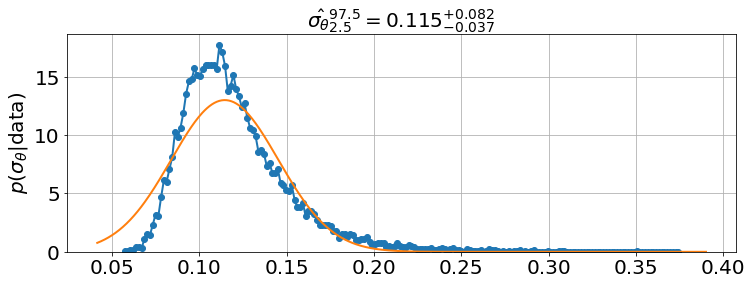

In [16]:
model.plot_distributions()

## two exponent model

In [51]:
from pyndamics import Simulation
from pyndamics.emcee import *

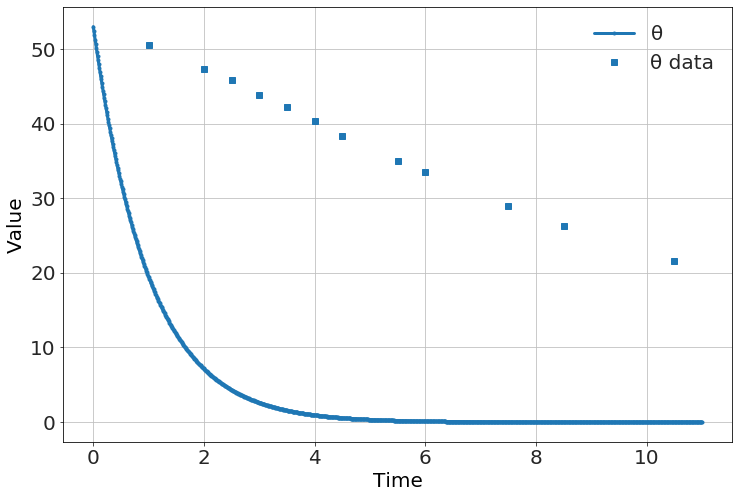

<Figure size 720x2250 with 0 Axes>

In [52]:
sim=Simulation()
sim.add("θ' = -Z*θ - C*exp(-p*t)",53,plot=True)
sim.params(Z=1,C=0.1,p=0.1)
sim.add_data(t=t,θ=y,plot=True)
sim.run(0,11)

Sampling Prior...


/Users/bblais/opt/anaconda3/lib/python3.7/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]


Done.
1.25 s
Running MCMC 1/4...
Done.
1 m, 14.82 s
Running MCMC 2/4...
Done.
48.21 s
Running MCMC 3/4...
Done.
46.51 s
Running MCMC 4/4...
Done.
47.66 s


<Figure size 720x2250 with 0 Axes>

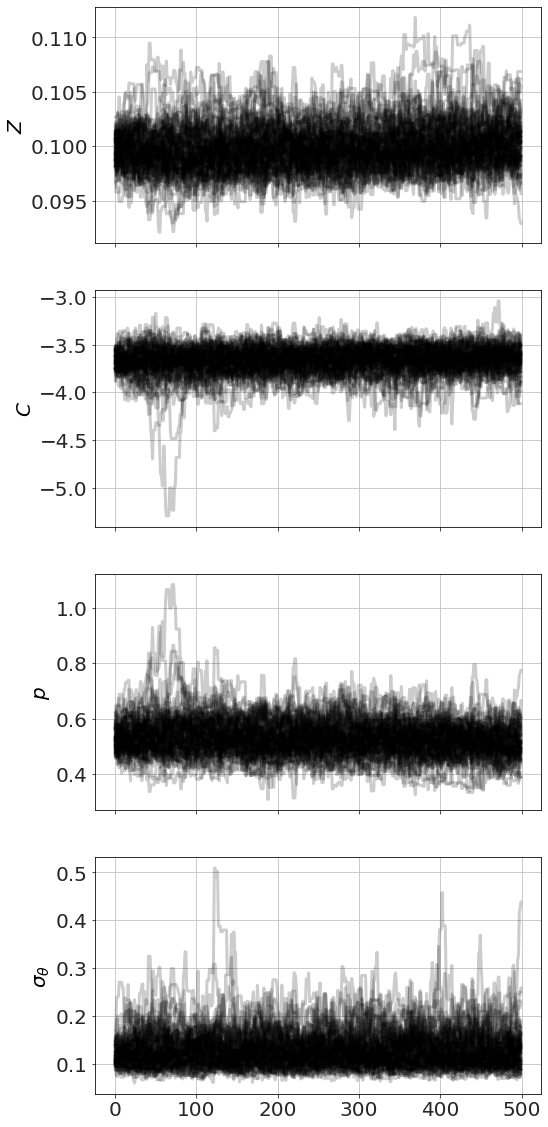

In [53]:
model=MCMCModel(sim,
               Z=Normal(5,10),
               C=Normal(5,10),
               p=Normal(0.5,0.5,all_positive=True),                
               )
model.run_mcmc(500,repeat=4)
model.plot_chains()

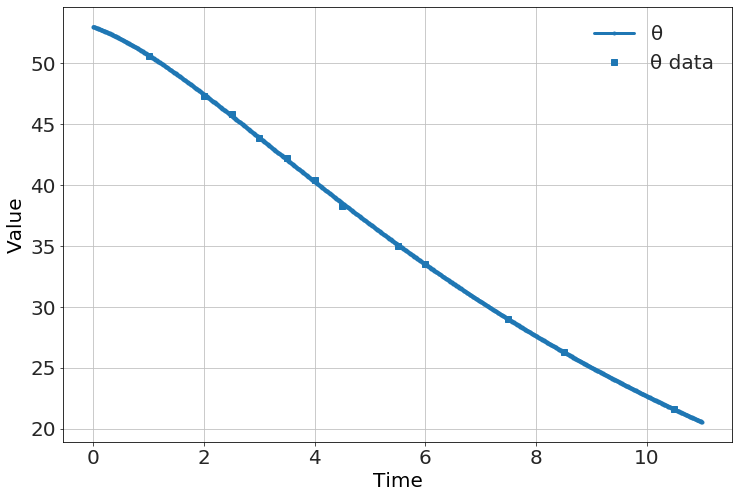

<Figure size 720x2250 with 0 Axes>

In [54]:
sim.run(0,11)

## $C<0$?  weird

Sampling Prior...
Done.
0.76 s
Running MCMC 1/4...
Done.
43.38 s
Running MCMC 2/4...
Done.
44.79 s
Running MCMC 3/4...
Done.
42.55 s
Running MCMC 4/4...
Done.
41.70 s


<Figure size 720x2250 with 0 Axes>

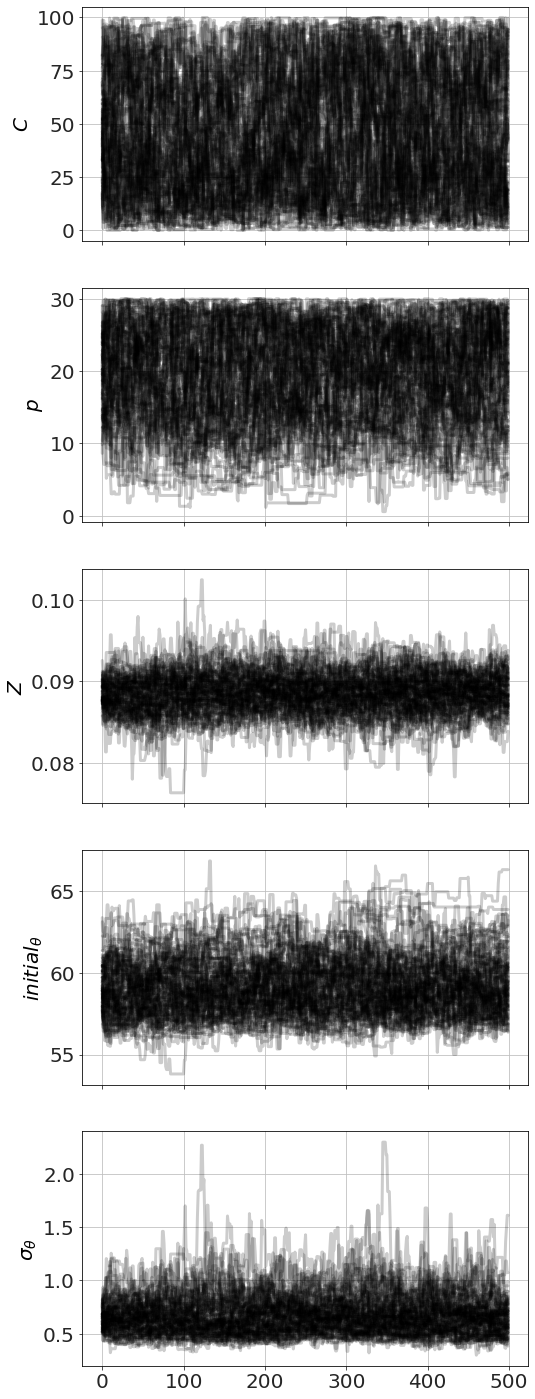

In [60]:
model=MCMCModel(sim,
                C=Uniform(0,100),
                p=Uniform(0,30),
                Z=Uniform(0,3),
                initial_θ=Normal(56,10),
               )
model.run_mcmc(500,repeat=4)
model.plot_chains()

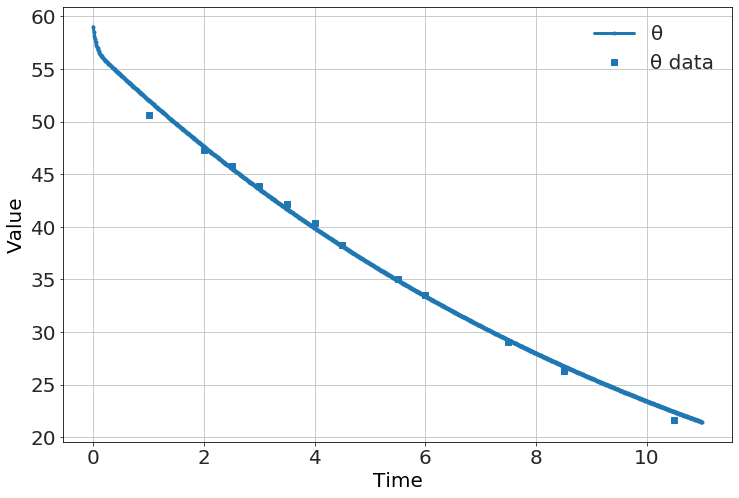

<Figure size 720x2250 with 0 Axes>

In [61]:
sim.run(0,11)

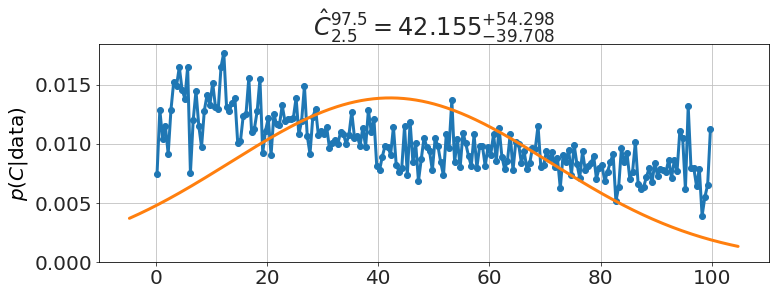

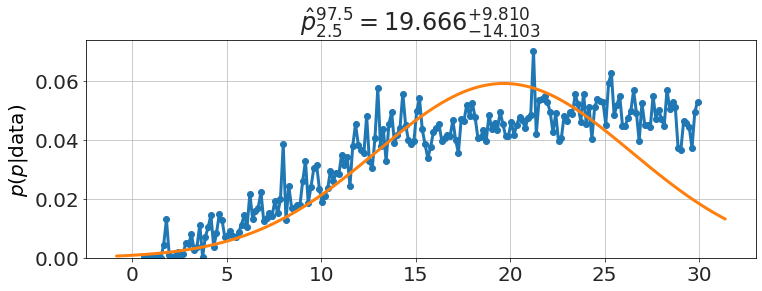

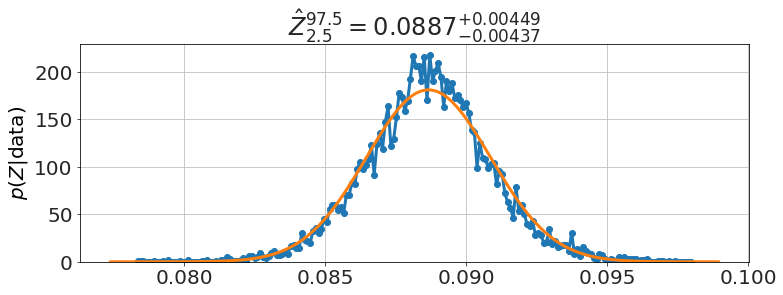

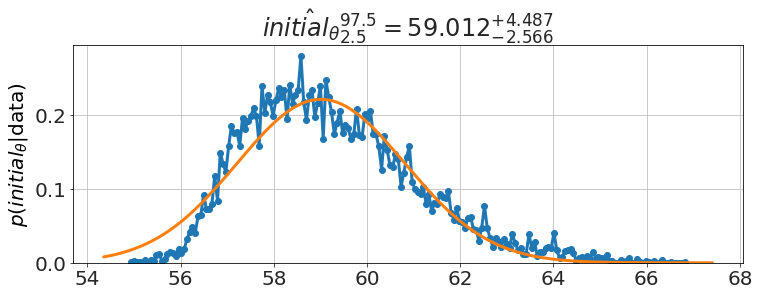

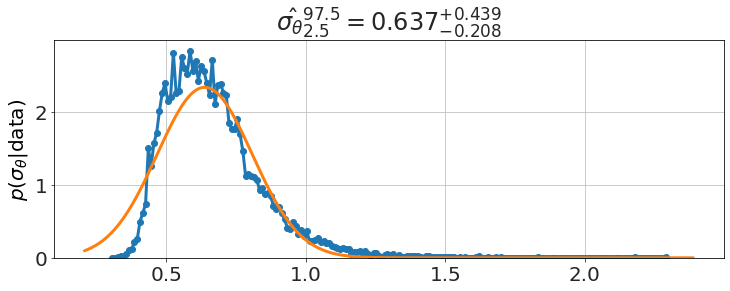

In [62]:
model.plot_distributions()

## What about the params in the presentation?

In [58]:
θ0=55.6
Z=.1
C=2.2
p=0.44
B=θ0-C/(Z-p)
B

62.07058823529412

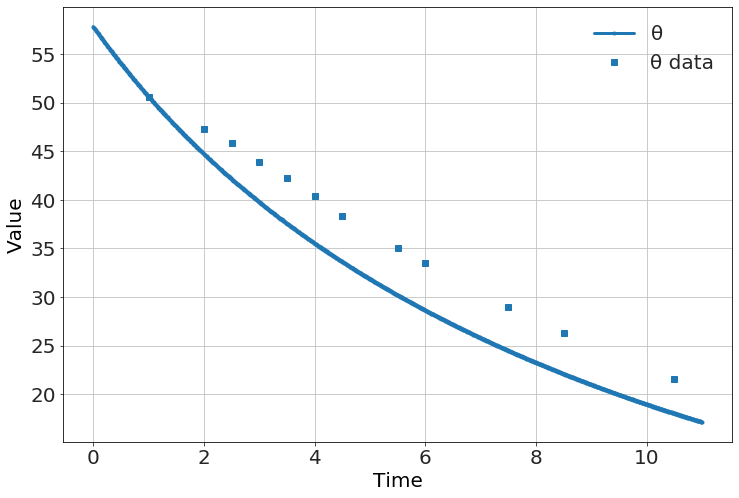

<Figure size 720x2250 with 0 Axes>

In [59]:
sim.params(Z=Z,C=C,p=p)
sim.run(0,11)

In [23]:
from sie.mcmc import MCMCModel,Uniform,Normal,Jeffreys

In [32]:
def P_data(data,C,p,Z,θ0,σ):
    t,θ=data
    μ=C*exp(-p*t)/(Z-p)+exp(-Z*t)*(θ0-C/(Z-p))
    distribution=Normal(μ,σ)
    return sum(distribution(θ))

In [36]:
θ=y
data=t,θ
model=MCMCModel(data,P_data,
                C=Uniform(0,10),
                p=Uniform(0,3),
                Z=Uniform(0,3),
                θ0=Normal(56,10),
                σ=Jeffreys(),
               )

Running MCMC...
Done.
2.53 s
Running MCMC...
Done.
2.68 s
figsize [10.0, 31.25]


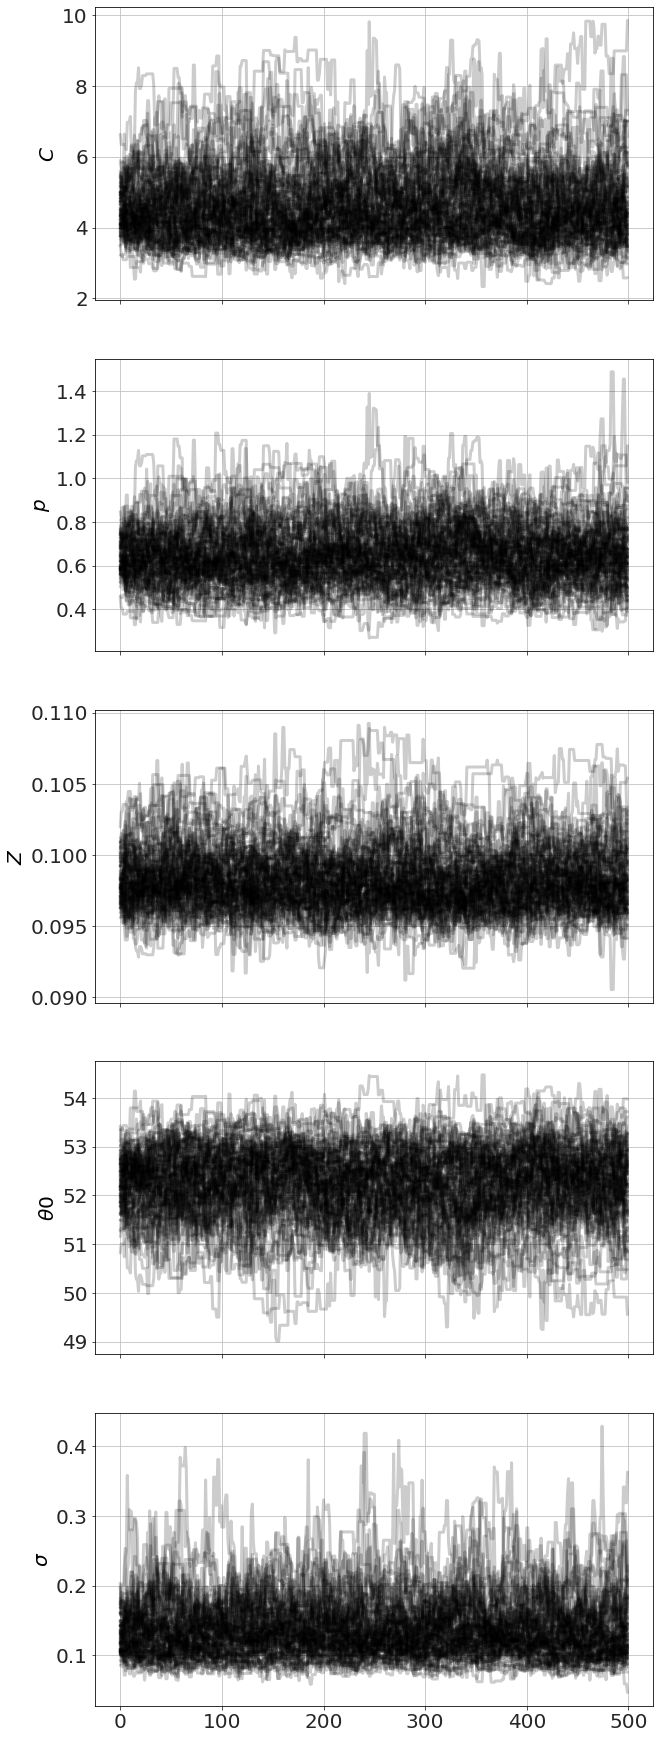

In [38]:
for i in range(2):
    model.run_mcmc(500)
    model.set_initial_values('samples')
model.plot_chains()

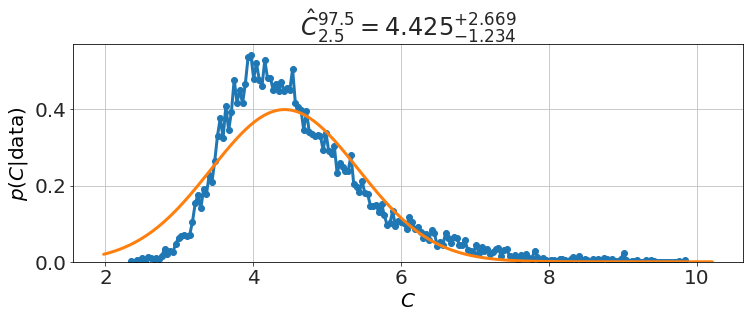

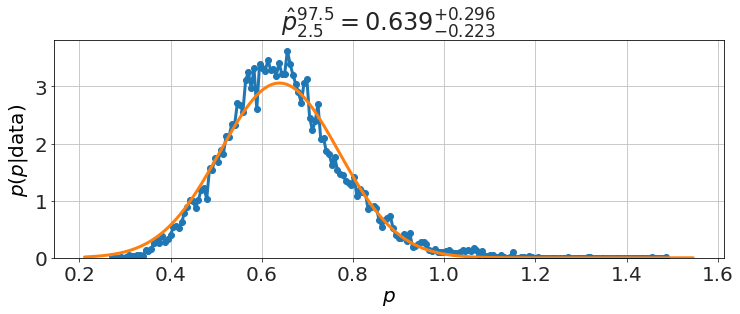

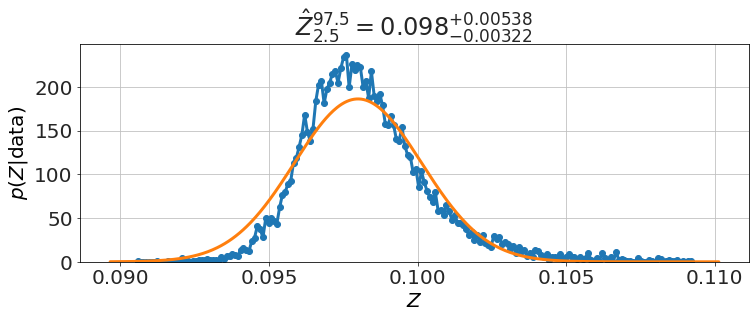

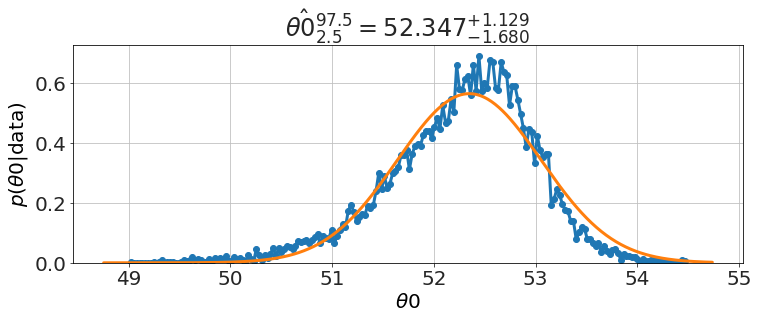

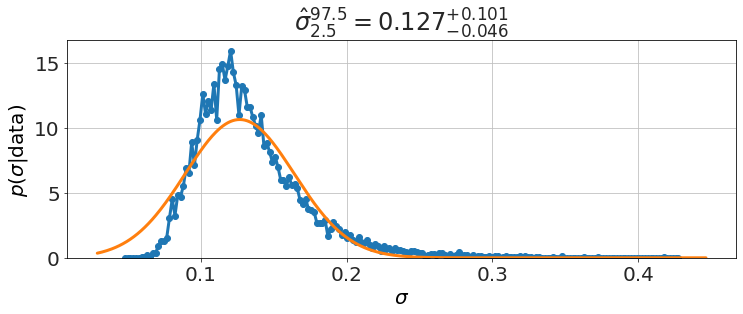

In [39]:
model.plot_distributions()

In [48]:
C_,p_,Z_,θ0_,σ_=model.get_samples('C','p','Z','θ0','σ')

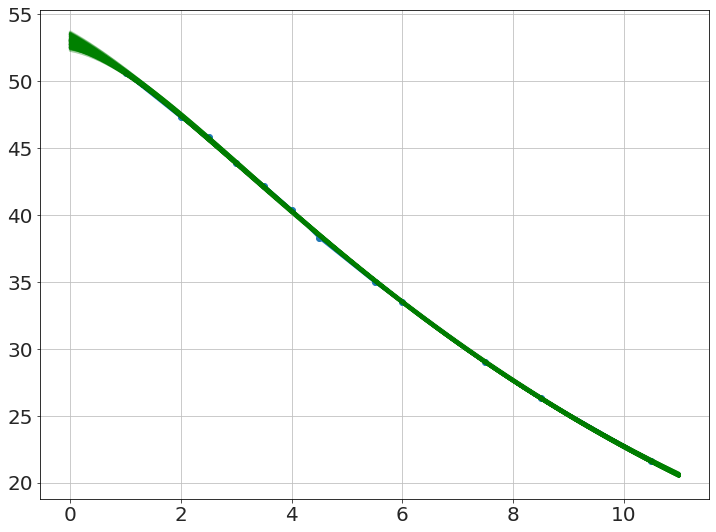

In [50]:
figure(figsize=(12,9))
i=0
plot(t,y,'-o')
tt=linspace(0,11,100)
for C,p,Z,θ0,σ in zip(C_,p_,Z_,θ0_,σ_):
    if i>300:
        break
        
    yy=C*exp(-p*tt)/(Z-p)+exp(-Z*tt)*(θ0-C/(Z-p))
    plot(tt,yy,'g-',alpha=0.1)
        
    i+=1